In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np
import scipy.stats as stats


In [2]:
# Load Data from JSON file
test = pd.read_json('stack-overflow-annual-developer-survey.json')

In [3]:
pprint(test.fields)

0        {'stackoverflowconsidermember': 'Yes', 'underg...
1        {'stackoverflowconsidermember': 'Yes', 'underg...
2        {'stackoverflowconsidermember': 'Yes', 'underg...
3        {'stackoverflowconsidermember': 'No', 'undergr...
4        {'stackoverflowconsidermember': 'Yes', 'devtyp...
5        {'stackoverflowconsidermember': 'No', 'undergr...
6        {'stackoverflowconsidermember': 'I'm not sure'...
7        {'stackoverflowconsidermember': 'Yes', 'underg...
8        {'frameworkdesirenextyear': '.NET Core', 'resp...
9        {'companysize': '100 to 499 employees', 'langu...
10       {'stackoverflowconsidermember': 'I'm not sure'...
11       {'stackoverflowconsidermember': 'Yes', 'underg...
12       {'stackoverflowconsidermember': 'Yes', 'underg...
13       {'stackoverflowconsidermember': 'Yes', 'underg...
14       {'stackoverflowconsidermember': 'I'm not sure'...
15       {'stackoverflowconsidermember': 'Yes', 'underg...
16       {'stackoverflowconsidermember': 'No', 'undergr.

In [4]:
# Convert to dataframe
df = pd.DataFrame(list(test.fields))
df.head()

,adblocker,adblockerdisable,adblockerreasons,adsactions,adsagreedisagree1,adsagreedisagree2,adsagreedisagree3,adspriorities1,adspriorities2,adspriorities3,...,surveyeasy,surveytoolong,timeafterbootcamp,timefullyproductive,undergradmajor,updatecv,versioncontrol,waketime,yearscoding,yearscodingprof
0,Yes,Yes,The website I was visiting forced me to disabl...,Clicked on an online advertisement;Saw an onli...,Strongly agree,Strongly agree,Neither agree nor disagree,2.0,5.0,6.0,...,Somewhat easy,The survey was too long,Less than a month,Less than a month,"Computer science, computer engineering, or sof...",A recruiter contacted me,I don't use version control,Between 6:01 - 7:00 AM,3-5 years,3-5 years
1,Yes,Yes,The website I was visiting forced me to disabl...,Clicked on an online advertisement;Saw an onli...,Neither agree nor disagree,Somewhat disagree,Neither agree nor disagree,5.0,3.0,1.0,...,Somewhat easy,The survey was too long,NaN,One to three months,"Computer science, computer engineering, or sof...",My job status or other personal status changed,Copying and pasting files to network shares;Zi...,Between 6:01 - 7:00 AM,3-5 years,3-5 years
2,Yes,Yes,The website I was visiting asked me to disable it,Clicked on an online advertisement,Strongly agree,Strongly agree,Strongly agree,NaN,NaN,NaN,...,Very difficult,The survey was too long,NaN,One to three months,"Computer science, computer engineering, or sof...",My job status or other personal status changed,Copying and pasting files to network shares;Zi...,Between 5:00 - 6:00 AM,0-2 years,0-2 years
3,Yes,No,NaN,Clicked on an online advertisement;Stopped goi...,Somewhat agree,Strongly disagree,Strongly disagree,1.0,6.0,3.0,...,Very easy,The survey was an appropriate length,NaN,One to three months,"Computer science, computer engineering, or sof...",My job status or other personal status changed,Subversion,Between 7:01 - 8:00 AM,9-11 years,6-8 years
4,Yes,No,NaN,NaN,Strongly disagree,Strongly disagree,Strongly agree,1.0,5.0,3.0,...,Very easy,The survey was an appropriate length,NaN,One to three months,NaN,NaN,Git,Between 9:01 - 10:00 AM,15-17 years,9-11 years


In [5]:
# Get a list of the column names
c = list(df.columns)
print(c)

['adblocker', 'adblockerdisable', 'adblockerreasons', 'adsactions', 'adsagreedisagree1', 'adsagreedisagree2', 'adsagreedisagree3', 'adspriorities1', 'adspriorities2', 'adspriorities3', 'adspriorities4', 'adspriorities5', 'adspriorities6', 'adspriorities7', 'age', 'agreedisagree1', 'agreedisagree2', 'agreedisagree3', 'aidangerous', 'aifuture', 'aiinteresting', 'airesponsible', 'assessbenefits1', 'assessbenefits10', 'assessbenefits11', 'assessbenefits2', 'assessbenefits3', 'assessbenefits4', 'assessbenefits5', 'assessbenefits6', 'assessbenefits7', 'assessbenefits8', 'assessbenefits9', 'assessjob1', 'assessjob10', 'assessjob2', 'assessjob3', 'assessjob4', 'assessjob5', 'assessjob6', 'assessjob7', 'assessjob8', 'assessjob9', 'careersatisfaction', 'checkincode', 'communicationtools', 'companysize', 'convertedsalary', 'country', 'currency', 'currencysymbol', 'databasedesirenextyear', 'databaseworkedwith', 'dependents', 'devtype', 'educationparents', 'educationtypes', 'employment', 'ergonomic

In [6]:
# list of columns to keep
toKeep = ['age', 'careersatisfaction', 'convertedsalary', 'country', 'currency', 
          'databasedesirenextyear', 'databaseworkedwith', 'devtype', 'educationtypes',
          'employment', 'jobsatisfaction', 'jobsearchstatus', 'languagedesirenextyear', 
          'languageworkedwith', 'lastnewjob', 'salary', 'salarytype', 'student', 'timeafterbootcamp', 
          'timefullyproductive', 'undergradmajor', 'waketime', 'yearscoding', 'yearscodingprof'
         ]

In [7]:
# remove unwanted colums
# empty list for toDrop
toDrop = []
for column in c:
    if column not in toKeep:
        toDrop.append(column)
# drop unwanted columns
df = df.drop(columns=toDrop)

In [8]:
df.head()

,age,careersatisfaction,convertedsalary,country,currency,databasedesirenextyear,databaseworkedwith,devtype,educationtypes,employment,...,lastnewjob,salary,salarytype,student,timeafterbootcamp,timefullyproductive,undergradmajor,waketime,yearscoding,yearscodingprof
0,18 - 24 years old,Extremely satisfied,NaN,India,Indian rupees (₹),"MongoDB;MySQL;SQLite;Microsoft Azure (Tables, ...",MySQL;SQLite,Game or graphics developer,Taken an online course in programming or softw...,Employed full-time,...,Between 2 and 4 years ago,NaN,Monthly,"Yes, full-time",Less than a month,Less than a month,"Computer science, computer engineering, or sof...",Between 6:01 - 7:00 AM,3-5 years,3-5 years
1,25 - 34 years old,Moderately satisfied,8400.0,Yemen,U.S. dollars ($),SQLite;Oracle,SQLite;Oracle,Data or business analyst;Educator or academic ...,"Taught yourself a new language, framework, or ...",Employed full-time,...,Less than a year ago,700.0,Monthly,No,NaN,One to three months,"Computer science, computer engineering, or sof...",Between 6:01 - 7:00 AM,3-5 years,3-5 years
2,25 - 34 years old,Moderately satisfied,4980.0,Bangladesh,U.S. dollars ($),MySQL;SQLite;Oracle,MySQL;SQLite;Oracle,Back-end developer;Database administrator;Desk...,Taken an online course in programming or softw...,Employed part-time,...,Between 1 and 2 years ago,415.0,Monthly,"Yes, part-time",NaN,One to three months,"Computer science, computer engineering, or sof...",Between 5:00 - 6:00 AM,0-2 years,0-2 years
3,25 - 34 years old,Moderately satisfied,36716.0,Spain,Euros (€),NaN,Oracle,Back-end developer,Taken an online course in programming or softw...,Employed full-time,...,Less than a year ago,30000.0,Yearly,No,NaN,One to three months,"Computer science, computer engineering, or sof...",Between 7:01 - 8:00 AM,9-11 years,6-8 years
4,25 - 34 years old,Slightly dissatisfied,51408.0,Finland,Euros (€),NaN,NaN,Mobile developer,Completed an industry certification program (e...,Employed full-time,...,Between 1 and 2 years ago,3500.0,Monthly,No,NaN,One to three months,NaN,Between 9:01 - 10:00 AM,15-17 years,9-11 years


In [9]:
# Whether the individual attended a boot camp is part of the string in the 'educationtypes' column. 
# Only fixed responses were allowed in the survey, and they were allowed to select multiple reposnses; each answer is delimited with a ';'
df.educationtypes.head()

0    Taken an online course in programming or softw...
1    Taught yourself a new language, framework, or ...
2    Taken an online course in programming or softw...
3    Taken an online course in programming or softw...
4    Completed an industry certification program (e...
Name: educationtypes, dtype: object

In [10]:
# Check if the string in 'educationtypes' contains 'bootcamp'
df['attendedBootcamp'] = df.educationtypes.str.contains('bootcamp')

In [11]:
# Format missing values as False
df['attendedBootcamp'] = df['attendedBootcamp'].fillna(False)

In [12]:
# Filter for just USA
df_USA = df.loc[df['country'] == 'United States']
df_USA = df_USA.reset_index()
df_USA.head()

,index,age,careersatisfaction,convertedsalary,country,currency,databasedesirenextyear,databaseworkedwith,devtype,educationtypes,...,salary,salarytype,student,timeafterbootcamp,timefullyproductive,undergradmajor,waketime,yearscoding,yearscodingprof,attendedBootcamp
0,7,25 - 34 years old,Extremely satisfied,60000.0,United States,U.S. dollars ($),SQL Server;PostgreSQL,SQL Server;PostgreSQL,Designer;Front-end developer,Taken an online course in programming or softw...,...,60000.0,Yearly,No,NaN,One to three months,Mathematics or statistics,Between 6:01 - 7:00 AM,3-5 years,3-5 years,False
1,16,25 - 34 years old,Extremely satisfied,57000.0,United States,U.S. dollars ($),SQL Server;MySQL;SQLite,MongoDB;SQL Server;MySQL;Elasticsearch,Back-end developer;Designer;DevOps specialist;...,Received on-the-job training in software devel...,...,57000.0,Yearly,No,NaN,Less than a month,"Computer science, computer engineering, or sof...",Before 5:00 AM,6-8 years,0-2 years,False
2,17,NaN,NaN,NaN,United States,NaN,PostgreSQL,PostgreSQL,Front-end developer,NaN,...,NaN,NaN,No,NaN,NaN,NaN,Between 6:01 - 7:00 AM,18-20 years,NaN,False
3,28,25 - 34 years old,Slightly satisfied,101000.0,United States,U.S. dollars ($),MongoDB;Redis;SQL Server;Amazon DynamoDB;Neo4j,MongoDB;Redis;SQL Server,Back-end developer;Front-end developer;Full-st...,Taken an online course in programming or softw...,...,101000.0,Yearly,No,NaN,One to three months,"Computer science, computer engineering, or sof...",Between 6:01 - 7:00 AM,9-11 years,3-5 years,False
4,32,18 - 24 years old,Extremely dissatisfied,900000.0,United States,U.S. dollars ($),SQL Server,SQL Server,Back-end developer;Data or business analyst;Da...,"Taught yourself a new language, framework, or ...",...,75000.0,Monthly,No,NaN,One to three months,"Computer science, computer engineering, or sof...",Between 7:01 - 8:00 AM,6-8 years,3-5 years,False


In [13]:
df_bootcamp = df_USA[df_USA.attendedBootcamp]
df_bootcamp.head()

,index,age,careersatisfaction,convertedsalary,country,currency,databasedesirenextyear,databaseworkedwith,devtype,educationtypes,...,salary,salarytype,student,timeafterbootcamp,timefullyproductive,undergradmajor,waketime,yearscoding,yearscodingprof,attendedBootcamp
46,207,25 - 34 years old,NaN,NaN,United States,NaN,NaN,NaN,Educator or academic researcher,Participated in a full-time developer training...,...,NaN,NaN,No,I already had a full-time job as a developer w...,NaN,"Computer science, computer engineering, or sof...",Between 5:00 - 6:00 AM,15-17 years,NaN,True
66,272,25 - 34 years old,Moderately satisfied,150000.0,United States,U.S. dollars ($),MongoDB;Redis;PostgreSQL,MongoDB;Redis;PostgreSQL,Back-end developer;Full-stack developer,Participated in a full-time developer training...,...,3000.0,Weekly,No,Immediately after graduating,Nine months to a year,"Computer science, computer engineering, or sof...",Between 7:01 - 8:00 AM,3-5 years,3-5 years,True
77,318,25 - 34 years old,Extremely satisfied,100000.0,United States,U.S. dollars ($),MongoDB;MySQL;PostgreSQL;Amazon DynamoDB,MongoDB;PostgreSQL;Amazon DynamoDB,Full-stack developer,Taken an online course in programming or softw...,...,100000.0,NaN,No,One to three months,Less than a month,"A natural science (ex. biology, chemistry, phy...",Between 7:01 - 8:00 AM,0-2 years,0-2 years,True
82,338,25 - 34 years old,Extremely satisfied,40000.0,United States,U.S. dollars ($),Redis,Redis,Data scientist or machine learning specialist;...,Participated in a full-time developer training...,...,40000.0,NaN,"Yes, full-time",I already had a full-time job as a developer w...,Three to six months,"Another engineering discipline (ex. civil, ele...",I do not have a set schedule,12-14 years,6-8 years,True
91,404,NaN,Extremely satisfied,140000.0,United States,U.S. dollars ($),MongoDB;Amazon DynamoDB,SQL Server;MySQL;SQLite;Microsoft Azure (Table...,Back-end developer;Desktop or enterprise appli...,Taken an online course in programming or softw...,...,140000.0,Yearly,No,I already had a full-time job as a developer w...,Nine months to a year,"Computer science, computer engineering, or sof...",Between 5:00 - 6:00 AM,15-17 years,15-17 years,True


In [14]:
print(df_bootcamp.shape)

(1798, 26)


In [15]:
# filter for data without bootcamp
df_nobootcamp = df_USA[df_USA.attendedBootcamp != True]
df_nobootcamp.head()

,index,age,careersatisfaction,convertedsalary,country,currency,databasedesirenextyear,databaseworkedwith,devtype,educationtypes,...,salary,salarytype,student,timeafterbootcamp,timefullyproductive,undergradmajor,waketime,yearscoding,yearscodingprof,attendedBootcamp
0,7,25 - 34 years old,Extremely satisfied,60000.0,United States,U.S. dollars ($),SQL Server;PostgreSQL,SQL Server;PostgreSQL,Designer;Front-end developer,Taken an online course in programming or softw...,...,60000.0,Yearly,No,NaN,One to three months,Mathematics or statistics,Between 6:01 - 7:00 AM,3-5 years,3-5 years,False
1,16,25 - 34 years old,Extremely satisfied,57000.0,United States,U.S. dollars ($),SQL Server;MySQL;SQLite,MongoDB;SQL Server;MySQL;Elasticsearch,Back-end developer;Designer;DevOps specialist;...,Received on-the-job training in software devel...,...,57000.0,Yearly,No,NaN,Less than a month,"Computer science, computer engineering, or sof...",Before 5:00 AM,6-8 years,0-2 years,False
2,17,NaN,NaN,NaN,United States,NaN,PostgreSQL,PostgreSQL,Front-end developer,NaN,...,NaN,NaN,No,NaN,NaN,NaN,Between 6:01 - 7:00 AM,18-20 years,NaN,False
3,28,25 - 34 years old,Slightly satisfied,101000.0,United States,U.S. dollars ($),MongoDB;Redis;SQL Server;Amazon DynamoDB;Neo4j,MongoDB;Redis;SQL Server,Back-end developer;Front-end developer;Full-st...,Taken an online course in programming or softw...,...,101000.0,Yearly,No,NaN,One to three months,"Computer science, computer engineering, or sof...",Between 6:01 - 7:00 AM,9-11 years,3-5 years,False
4,32,18 - 24 years old,Extremely dissatisfied,900000.0,United States,U.S. dollars ($),SQL Server,SQL Server,Back-end developer;Data or business analyst;Da...,"Taught yourself a new language, framework, or ...",...,75000.0,Monthly,No,NaN,One to three months,"Computer science, computer engineering, or sof...",Between 7:01 - 8:00 AM,6-8 years,3-5 years,False


In [16]:
print(df_nobootcamp.shape)

(18511, 26)


In [17]:
test = df_bootcamp['convertedsalary'].dropna()
test.describe()

count    1.413000e+03
mean     1.513185e+05
std      2.850062e+05
min      0.000000e+00
25%      7.200000e+04
50%      9.800000e+04
75%      1.300000e+05
max      2.000000e+06
Name: convertedsalary, dtype: float64

In [18]:
test2 = df_nobootcamp['convertedsalary'].dropna()
test2.describe()

count    1.152800e+04
mean     1.547924e+05
std      2.918289e+05
min      0.000000e+00
25%      7.100000e+04
50%      1.000000e+05
75%      1.300000e+05
max      2.000000e+06
Name: convertedsalary, dtype: float64

In [19]:
# T test to check if salaries are different between boootcamp and non bootcamp attendees
stats.ttest_ind(test, test2)

Ttest_indResult(statistic=-0.42341167133397306, pvalue=0.6720019684999738)

In [39]:
# check salary
dfYoung = df_USA[df_USA.employment == 'Employed full-time']
dfYoung = dfYoung[dfYoung.student == 'No']
dfYoung = dfYoung[(dfYoung['yearscoding'] == '0-2 years')] #| (dfYoung['yearscoding'] == '3-5 years')]
dfYoung = dfYoung.dropna(subset=['convertedsalary'])
df_degrees = dfYoung.groupby(['undergradmajor']).median()

In [40]:
dfYoung.describe()

,index,convertedsalary,salary
count,444.000000,4.440000e+02,444.000000
mean,45494.885135,1.331240e+05,67664.326577
std,28003.282842,3.086795e+05,28161.382674
min,197.000000,0.000000e+00,0.000000
25%,22491.750000,5.500000e+04,52875.000000
50%,42575.500000,7.000000e+04,65000.000000
75%,68798.000000,8.500000e+04,80000.000000
max,98644.000000,2.000000e+06,275000.000000


In [41]:
df_degrees.describe()

,index,convertedsalary,salary
count,12.000000,12.000000,12.000000
mean,47539.708333,65333.000000,63958.000000
std,11051.242136,11714.068263,11208.620254
min,36025.000000,34496.000000,34496.000000
25%,39531.750000,63750.000000,61500.000000
50%,45560.000000,67500.000000,66500.000000
75%,49239.500000,72750.000000,70000.000000
max,71508.000000,77500.000000,77500.000000


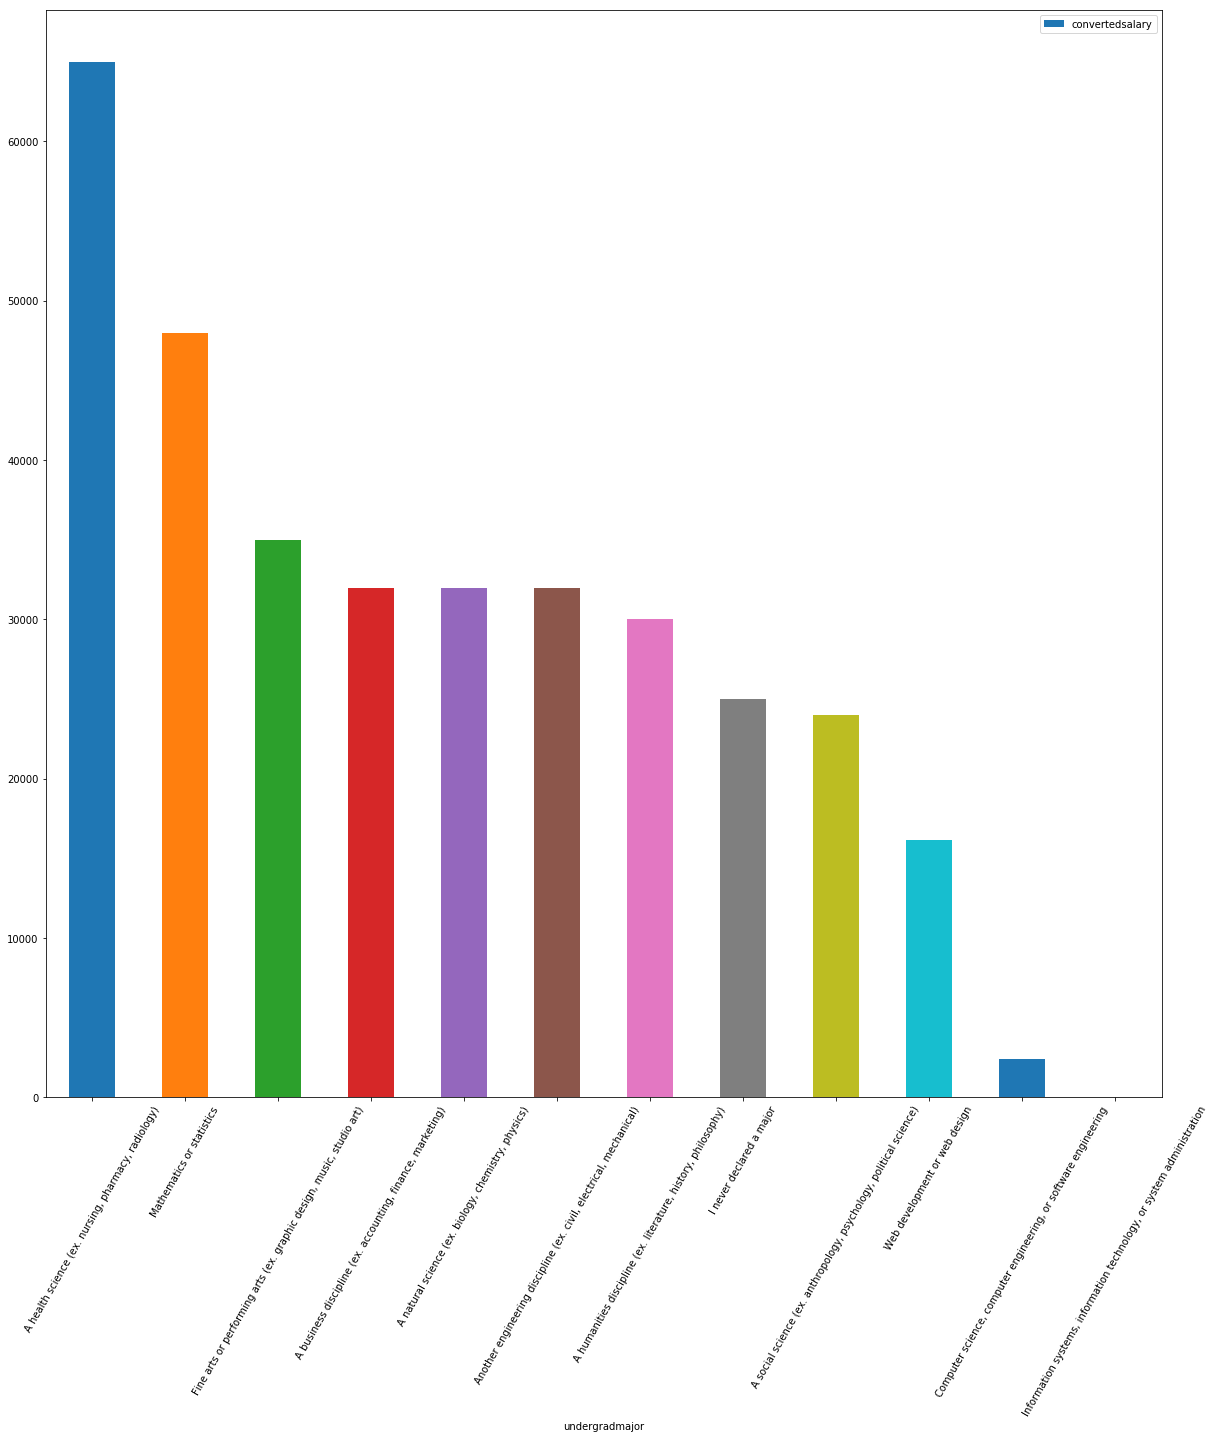

In [32]:
# Sort df by descending values
df_sorted = df_degrees.sort_values(by='convertedsalary', ascending=False)

# save sorted df to json
# df_sorted.to_json('median_salary_by_undergrad.json')

df_sorted.plot(kind='bar', y='convertedsalary', figsize=(20,20), rot=60)

In [28]:
# reset index
df_sorted = df_sorted.reset_index()
df_sorted.head()

,undergradmajor,index,convertedsalary,salary,attendedBootcamp
0,"Another engineering discipline (ex. civil, ele...",51101.0,77500.0,77500.0,False
1,"A humanities discipline (ex. literature, histo...",45243.0,75000.0,73000.0,True
2,"A social science (ex. anthropology, psychology...",46969.5,75000.0,70000.0,True
3,"Computer science, computer engineering, or sof...",41366.0,72000.0,70000.0,False
4,"A health science (ex. nursing, pharmacy, radio...",66528.0,70000.0,70000.0,False


In [29]:
# rename columns to 'catergory' and 'values' for vega
df_sorted = df_sorted.rename(columns={'undergradmajor':'category', 'convertedsalary':'amount'})

# drop other columns
df_sorted = df_sorted.drop(columns=['index', 'salary', 'attendedBootcamp'])

df_sorted.head()

,category,amount
0,"Another engineering discipline (ex. civil, ele...",77500.0
1,"A humanities discipline (ex. literature, histo...",75000.0
2,"A social science (ex. anthropology, psychology...",75000.0
3,"Computer science, computer engineering, or sof...",72000.0
4,"A health science (ex. nursing, pharmacy, radio...",70000.0


In [39]:
testList = []

for i, row in df_sorted.iterrows():
    d = {}
    d['category'] = row[0]
    d['amount'] = row[1]
  
    testList.append(d)
    
for d in testList:
    print(d)
    
    

{'category': 'Another engineering discipline (ex. civil, electrical, mechanical)', 'amount': 77500.0}
{'category': 'A humanities discipline (ex. literature, history, philosophy)', 'amount': 75000.0}
{'category': 'A social science (ex. anthropology, psychology, political science)', 'amount': 75000.0}
{'category': 'Computer science, computer engineering, or software engineering', 'amount': 72000.0}
{'category': 'A health science (ex. nursing, pharmacy, radiology)', 'amount': 70000.0}
{'category': 'Mathematics or statistics', 'amount': 70000.0}
{'category': 'A business discipline (ex. accounting, finance, marketing)', 'amount': 65000.0}
{'category': 'A natural science (ex. biology, chemistry, physics)', 'amount': 65000.0}
{'category': 'Fine arts or performing arts (ex. graphic design, music, studio art)', 'amount': 65000.0}
{'category': 'Information systems, information technology, or system administration', 'amount': 60000.0}
{'category': 'I never declared a major', 'amount': 55000.0}
{'

In [32]:
for d in testList:
    print(d)

{'category': 'Web development or web design', 'amount': 34496.0}
{'category': 'Web development or web design', 'amount': 34496.0}
{'category': 'Web development or web design', 'amount': 34496.0}
{'category': 'Web development or web design', 'amount': 34496.0}
{'category': 'Web development or web design', 'amount': 34496.0}
{'category': 'Web development or web design', 'amount': 34496.0}
{'category': 'Web development or web design', 'amount': 34496.0}
{'category': 'Web development or web design', 'amount': 34496.0}
{'category': 'Web development or web design', 'amount': 34496.0}
{'category': 'Web development or web design', 'amount': 34496.0}
{'category': 'Web development or web design', 'amount': 34496.0}
{'category': 'Web development or web design', 'amount': 34496.0}


In [38]:
# save sorted file as json
df_sorted.to_json('sorted_salary_vega.json', index=False, orient='table')

In [24]:
# Get just the young coders who took a bootcamp
df_newBootcamp = dfYoung[dfYoung.attendedBootcamp]
df_newBootcamp

,index,age,careersatisfaction,convertedsalary,country,currency,databasedesirenextyear,databaseworkedwith,devtype,educationtypes,...,salary,salarytype,student,timeafterbootcamp,timefullyproductive,undergradmajor,waketime,yearscoding,yearscodingprof,attendedBootcamp
77,318,25 - 34 years old,Extremely satisfied,100000.0,United States,U.S. dollars ($),MongoDB;MySQL;PostgreSQL;Amazon DynamoDB,MongoDB;PostgreSQL;Amazon DynamoDB,Full-stack developer,Taken an online course in programming or softw...,...,100000.0,NaN,No,One to three months,Less than a month,"A natural science (ex. biology, chemistry, phy...",Between 7:01 - 8:00 AM,0-2 years,0-2 years,True
235,1084,25 - 34 years old,Moderately satisfied,57200.0,United States,U.S. dollars ($),"Cassandra;Redis;Microsoft Azure (Tables, Cosmo...","MongoDB;MySQL;SQLite;Microsoft Azure (Tables, ...",Back-end developer;QA or test developer,Taken an online course in programming or softw...,...,57200.0,Yearly,No,One to three months,Less than a month,NaN,Between 7:01 - 8:00 AM,0-2 years,0-2 years,True
243,1127,25 - 34 years old,Moderately satisfied,43000.0,United States,U.S. dollars ($),MongoDB;MySQL;MariaDB,MySQL,Front-end developer;Full-stack developer,Taken an online course in programming or softw...,...,43000.0,NaN,No,One to three months,Less than a month,"A humanities discipline (ex. literature, histo...",Between 6:01 - 7:00 AM,0-2 years,0-2 years,True
260,1207,18 - 24 years old,Slightly satisfied,36000.0,United States,U.S. dollars ($),MongoDB;Redis;MySQL,MySQL,Full-stack developer,Participated in a full-time developer training...,...,3000.0,Monthly,No,I haven’t gotten a developer job,One to three months,"Computer science, computer engineering, or sof...",Between 5:00 - 6:00 AM,0-2 years,0-2 years,True
447,1984,35 - 44 years old,Extremely satisfied,50000.0,United States,U.S. dollars ($),"Microsoft Azure (Tables, CosmosDB, SQL, etc);G...",MongoDB;MySQL;PostgreSQL,Full-stack developer,Participated in a full-time developer training...,...,50000.0,Yearly,No,One to three months,One to three months,"A business discipline (ex. accounting, finance...",Between 6:01 - 7:00 AM,0-2 years,0-2 years,True
493,2217,25 - 34 years old,Extremely satisfied,120000.0,United States,U.S. dollars ($),PostgreSQL,PostgreSQL,Front-end developer;Full-stack developer,Participated in a full-time developer training...,...,120000.0,Yearly,No,Less than a month,One to three months,Fine arts or performing arts (ex. graphic desi...,Between 6:01 - 7:00 AM,0-2 years,0-2 years,True
523,2383,25 - 34 years old,Extremely satisfied,80000.0,United States,U.S. dollars ($),MongoDB,MongoDB;MySQL;PostgreSQL;SQLite,Front-end developer,Taken an online course in programming or softw...,...,80000.0,Yearly,No,Immediately after graduating,One to three months,"A business discipline (ex. accounting, finance...",Between 5:00 - 6:00 AM,0-2 years,0-2 years,True
539,2460,25 - 34 years old,Moderately satisfied,60500.0,United States,U.S. dollars ($),NaN,NaN,Back-end developer;Front-end developer;Full-st...,Participated in a full-time developer training...,...,60500.0,Yearly,No,Immediately after graduating,Less than a month,"A social science (ex. anthropology, psychology...",Between 6:01 - 7:00 AM,0-2 years,0-2 years,True
549,2505,25 - 34 years old,Moderately satisfied,82000.0,United States,U.S. dollars ($),Elasticsearch,Redis;PostgreSQL,Back-end developer;Designer;Front-end develope...,Participated in a full-time developer training...,...,82000.0,Yearly,No,Immediately after graduating,Less than a month,"A social science (ex. anthropology, psychology...",Between 7:01 - 8:00 AM,0-2 years,0-2 years,True
601,2723,25 - 34 years old,Slightly satisfied,55000.0,United States,U.S. dollars ($),MongoDB;Redis;MySQL,SQL Server,Back-end developer;Designer;Front-end develope...,Participated in a full-time developer training...,...,55000.0,Yearly,No,Less than a month,Six to nine months,Fine arts or performing arts (ex. graphic desi...,Between 7:01 - 8:00 AM,0-2 years,0

In [25]:
# Group the young coders with a bootcamp by major. Group them by count
df_bootcampMajor = df_newBootcamp.groupby(['undergradmajor']).count()

# Keep just the index column and rename it to 'count'
df_bootcampMajor = pd.DataFrame(df_bootcampMajor['index'])
df_bootcampMajor = df_bootcampMajor.rename(columns={'index': 'AttendedBootcamp'})
df_bootcampMajor

,AttendedBootcamp
undergradmajor,
"A business discipline (ex. accounting, finance, marketing)",24
"A health science (ex. nursing, pharmacy, radiology)",1
"A humanities discipline (ex. literature, history, philosophy)",48
"A natural science (ex. biology, chemistry, physics)",20
"A social science (ex. anthropology, psychology, political science)",43
"Another engineering discipline (ex. civil, electrical, mechanical)",9
"Computer science, computer engineering, or software engineering",7
"Fine arts or performing arts (ex. graphic design, music, studio art)",20
I never declared a major,5


In [26]:
# Get the total count of young coders grouped by major
df_totalCount = dfYoung.groupby(['undergradmajor']).count()

# Keep only 'index' column
df_totalCount = pd.DataFrame(df_totalCount['index'])
# rename index column
df_totalCount = df_totalCount.rename(columns={'index': 'TotalCount'})
df_totalCount

,TotalCount
undergradmajor,
"A business discipline (ex. accounting, finance, marketing)",49
"A health science (ex. nursing, pharmacy, radiology)",3
"A humanities discipline (ex. literature, history, philosophy)",63
"A natural science (ex. biology, chemistry, physics)",41
"A social science (ex. anthropology, psychology, political science)",68
"Another engineering discipline (ex. civil, electrical, mechanical)",34
"Computer science, computer engineering, or software engineering",49
"Fine arts or performing arts (ex. graphic design, music, studio art)",31
I never declared a major,7


In [27]:
# Join total dataframe with the bootcamp df
df_bootCount = pd.concat([df_bootcampMajor, df_totalCount], axis=1)

# Caclculate percentage column
df_bootCount['PercentAttended'] = 100 * df_bootCount['AttendedBootcamp']/df_bootCount['TotalCount']

df_bootCount

,AttendedBootcamp,TotalCount,PercentAttended
undergradmajor,,,
"A business discipline (ex. accounting, finance, marketing)",24,49,48.979592
"A health science (ex. nursing, pharmacy, radiology)",1,3,33.333333
"A humanities discipline (ex. literature, history, philosophy)",48,63,76.190476
"A natural science (ex. biology, chemistry, physics)",20,41,48.780488
"A social science (ex. anthropology, psychology, political science)",43,68,63.235294
"Another engineering discipline (ex. civil, electrical, mechanical)",9,34,26.470588
"Computer science, computer engineering, or software engineering",7,49,14.285714
"Fine arts or performing arts (ex. graphic design, music, studio art)",20,31,64.516129
I never declared a major,5,7,71.428571


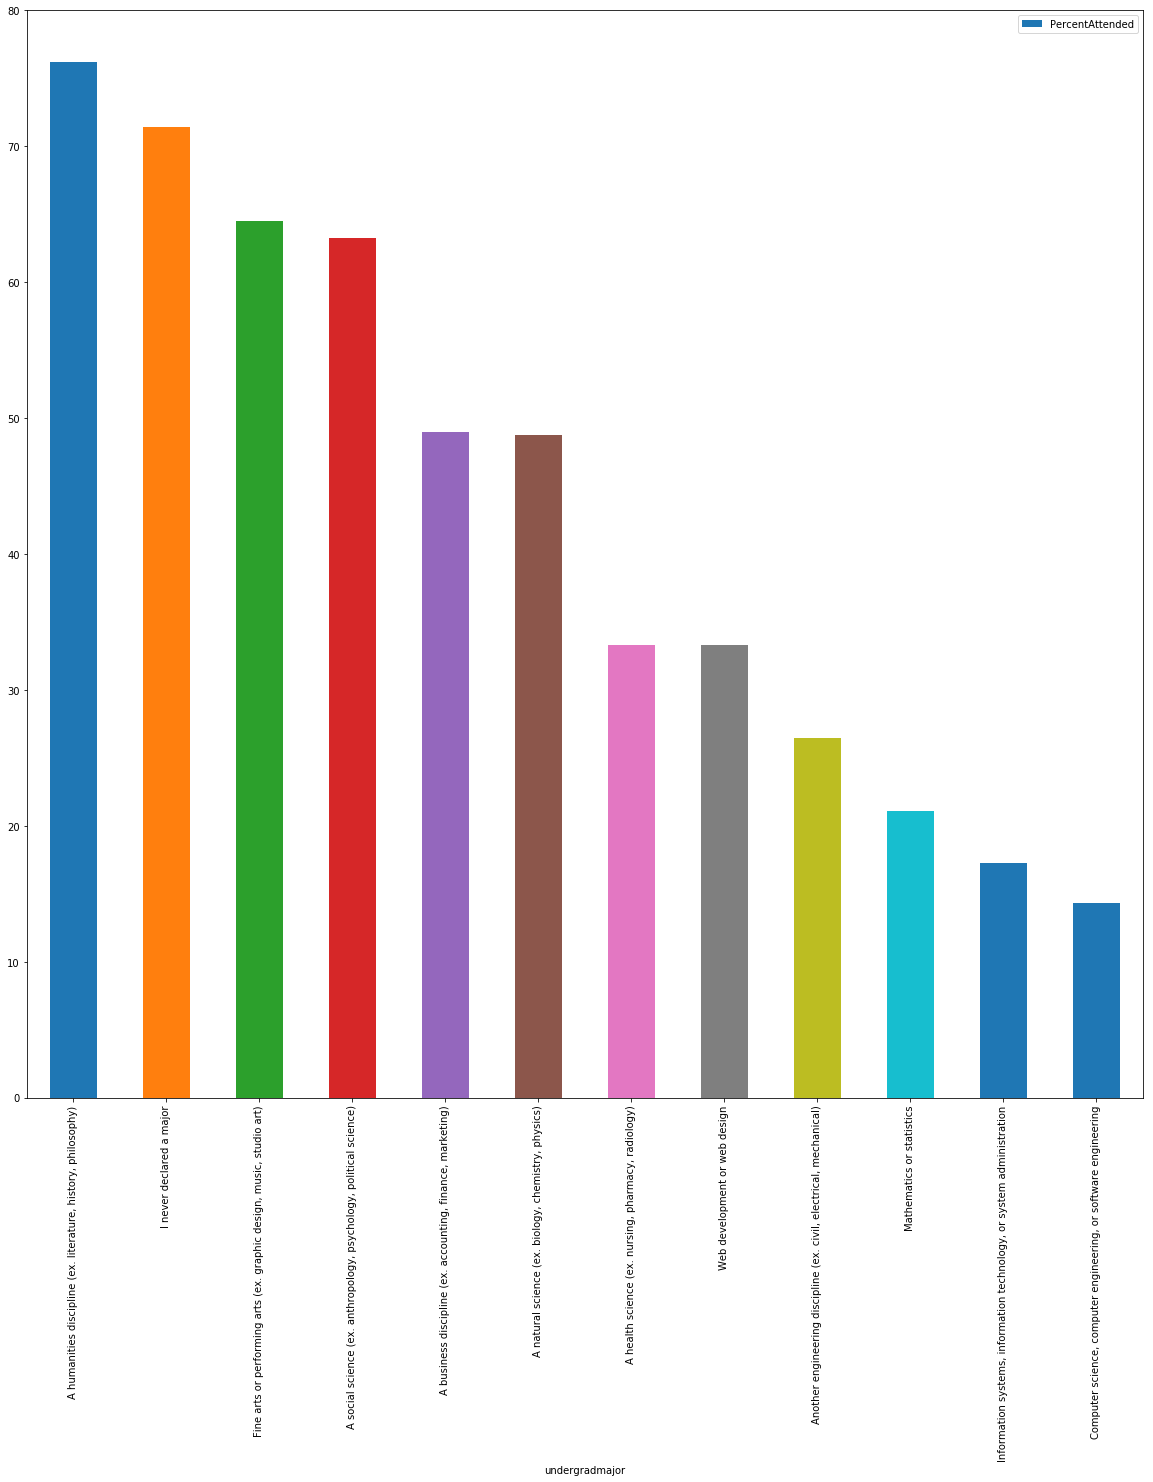

In [28]:
df_bootCount.sort_values(by='PercentAttended', ascending=False).plot(kind='bar', y='PercentAttended', figsize=(20,20))

In [29]:
# Drop devtypes that selected multiple options. Some people selected nearly all the options, which makes the data nearly useless
# Multiple selections have a ';' in them
df_devtype = df_USA.dropna(subset=['devtype', 'convertedsalary'])
df_devtype = df_devtype[~df_devtype.devtype.str.contains(';')]
df_devtype = df_devtype.groupby('devtype').median()
df_devtype

,index,convertedsalary,salary,attendedBootcamp
devtype,,,,
Back-end developer,47707.0,115000.0,110000.0,0.0
"C-suite executive (CEO, CTO, etc.)",45350.0,155000.0,155000.0,0.0
Data or business analyst,49669.0,68000.0,65000.0,0.0
Data scientist or machine learning specialist,45549.0,110000.0,106000.0,0.0
Database administrator,45062.0,99000.0,99000.0,0.0
Designer,33920.5,47800.0,47800.0,0.0
Desktop or enterprise applications developer,37553.5,97500.0,92000.0,0.0
DevOps specialist,46520.0,115000.0,113500.0,0.0
Educator or academic researcher,28763.0,60000.0,60000.0,0.0


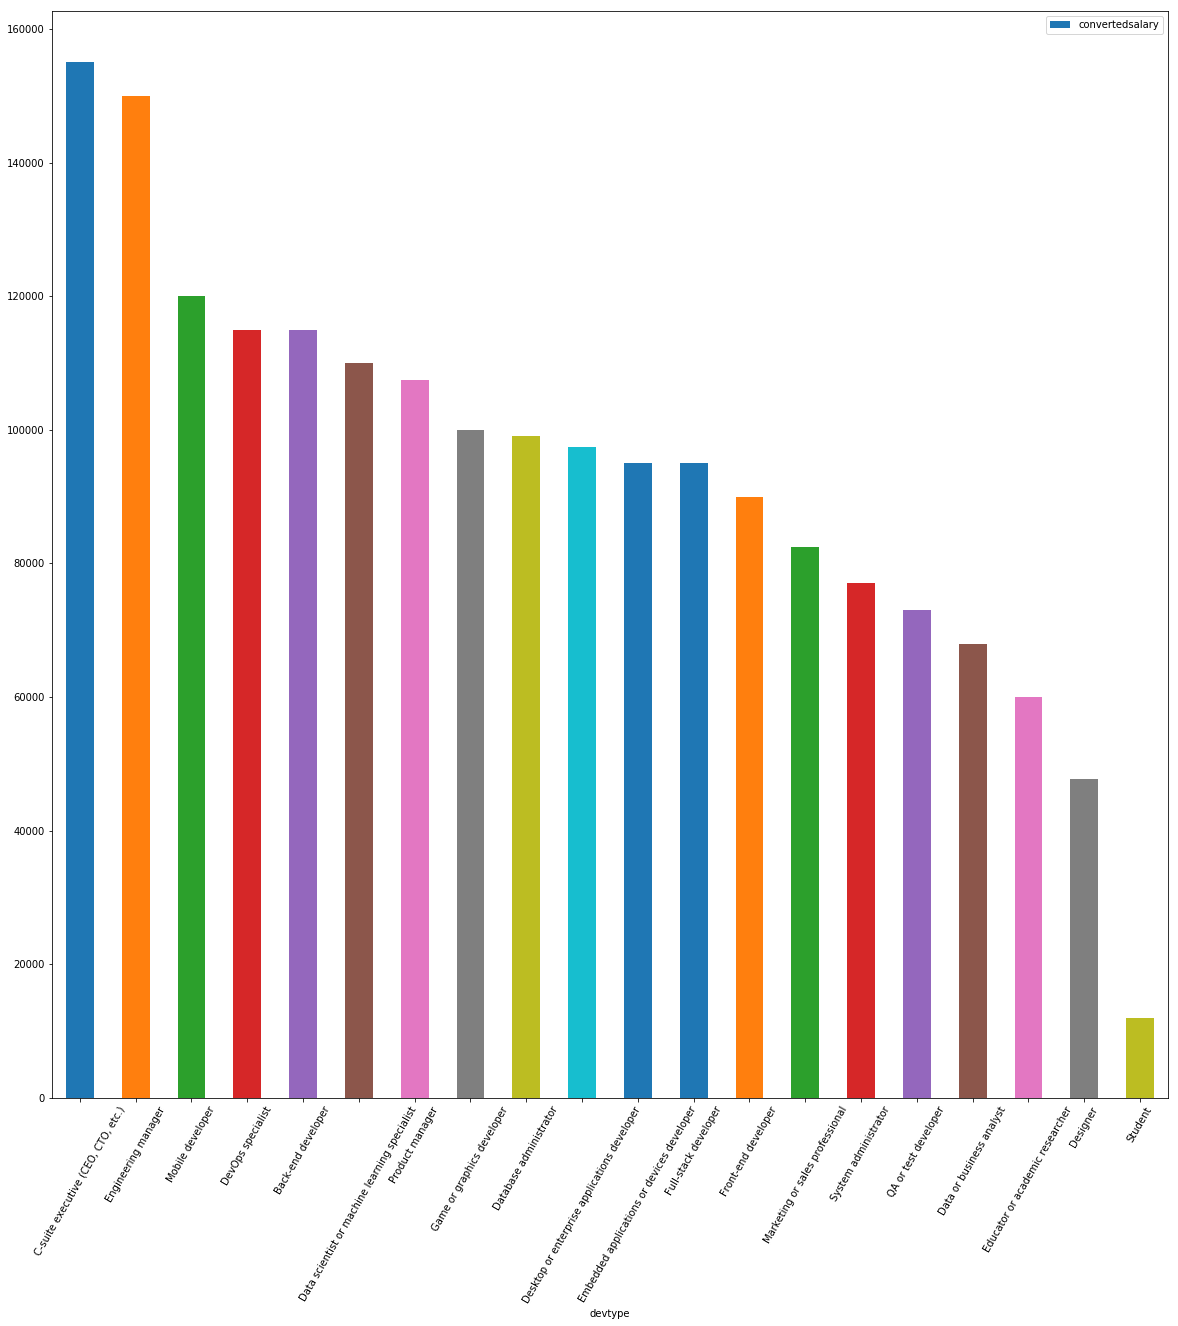

In [30]:
df_devtype.sort_values(by='convertedsalary', ascending=False).plot(kind='bar', y='convertedsalary', figsize=(20,20), rot=60)